# Particle Neural Network

Imports Three handcrafted files, in addition to the standard numpy and matplotlib moduals.  ParticleNet.py is the neural network, which takes as input 4-vectors generated using ExpodentialDistribution.py and GaussianDistribution.py which produced 3-vector momentum and a mass vector each, where the mass vector is radomly drawn from either an expodential or a gaussian distribution respectivly.  PlotResults contains a plot function, which plots the distribution of the precentages of the Particle Neural Network's predictions for a single particle.

In [12]:
from ExpodentialDistribution import Exp
from GaussianDistribution import Gauss
from ParticleNet import ParticleNet
import numpy as np
from PlotResults import plot
import matplotlib.pyplot as plt
import tensorflow as tf

These are the only constants needed to run this simulation thus far.  'p' the momentum is constant for all particles.  Ntrain is the number of samples the particle neural network will train on, and Ntest is the number of particles the neural network will test on.

In [13]:
p = 100
Ntrain = 1000000
Ntest = 1000000

Below, we generate our data to feed into the particle neural network.  First we create training and testing data sets from the expodential distribution modual and then the gaussian modual.  Both moduals generate a 4-vector, which includes a 3-vector momentum and a mass vector where the masses are drawn from the respective distribution at random.  Besides the 4-vector, a vector idicating that which distribution each piece of data belongs to is returned, a vector of all zeros for the expodential distribution and a vector of all ones for the gaussian.

In [14]:
ETrain,ETrainVals = Exp(p,Ntrain)
ETest,ETestVals = Exp(p,Ntest)

GTrain,GTrainVals = Gauss(p,Ntrain)
GTest,GTestVals = Gauss(p,Ntest)

Here, we are just concatinating the data from the expodential and gaussian distributions into a single training and testing data set.

In [15]:
Train = np.zeros((2*Ntrain,5))
Test = np.zeros((2*Ntest,5))

Train[:Ntrain,0:4] = ETrain
Train[Ntrain:,0:4] = GTrain
Train[:Ntrain,4] = ETrainVals
Train[Ntrain:,4] = GTrainVals

Test[:Ntest,0:4] = ETest
Test[Ntest:,0:4] = GTest
Test[:Ntrain,4] = ETrainVals
Test[Ntrain:,4] = GTrainVals

BUFFER_SIZE = Ntrain
BATCH_SIZE = Ntrain*2
train_dataset = tf.data.Dataset.from_tensor_slices(Train).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = tf.data.Dataset.from_tensor_slices(Test).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [16]:
for i in train_dataset.take(-1):
    train = i[0:,0:4]
    train_vals = i[0:,4]
for i in test_dataset.take(-1):
    test = i[0:,0:4]
    test_vals = i[0:,4]
train = np.array(train)
train_vals = np.array(train_vals)
test = np.array(test)
test_vals = np.array(test_vals)

Below is the particle neural network being run on the data generated.

In [17]:
predict = ParticleNet(train,train_vals,test)

Epoch 1/3
62500/62500 [==============================] - 32s 507us/step - loss: 0.4082 - accuracy: 0.8344
Epoch 2/3
62500/62500 [==============================] - 31s 501us/step - loss: 0.3538 - accuracy: 0.8511
Epoch 3/3
62500/62500 [==============================] - 25s 406us/step - loss: 0.3454 - accuracy: 0.8514

Test accuracy: 0.8514189720153809


Below, we take a look at the masses for the expodential distribution.

Text(0.5, 1.0, 'Expodential Distrubution')

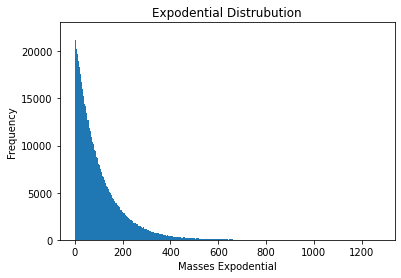

In [18]:
n, bins, patches = plt.hist(x=ETrain[:,3], bins='auto')
plt.xlabel('Masses Expodential')
plt.ylabel('Frequency')
plt.title('Expodential Distrubution')

Below is a plot of the masses randomly generated from a Gaussian distribution.

Text(0.5, 1.0, 'Normal Distrubution')

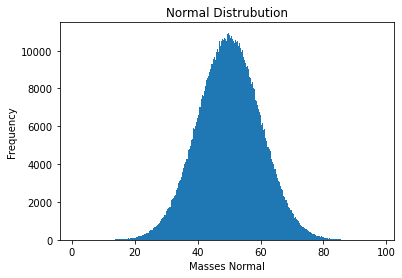

In [19]:
n, bins, patches = plt.hist(x=GTrain[:,3], bins='auto')
plt.xlabel('Masses Normal')
plt.ylabel('Frequency')
plt.title('Normal Distrubution')

Text(0.5, 1.0, 'Normal Distrubution')

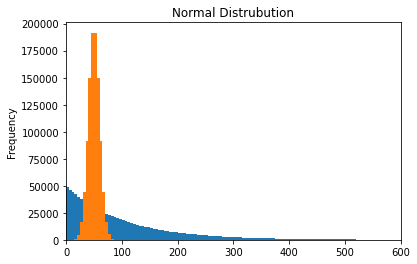

In [20]:
n2, bins2, patches2 = plt.hist(x=ETrain[:,3], bins=np.arange(0,1000,5))
n, bins, patches = plt.hist(x=GTrain[:,3], bins=np.arange(0,1000,5))
plt.xlim(0,600)
plt.ylabel('Frequency')
plt.title('Normal Distrubution')

In [21]:
integN = np.sum(n2)
integG = np.sum(n)
print(integN)
print(integG)
xmin = np.argwhere(bins==25).flatten()[0]
xmax = np.argwhere(bins==75).flatten()[0]
ratio = np.sum(n2[xmin:xmax])/np.sum(n[xmin:xmax])
print(ratio)

999948.0
1000000.0
0.3102981784453245


In [22]:
FalseExps = sum(predict[:Ntest])/Ntest*100
print("The model, on average, thought a Expodential distribution to be just that at " + str(FalseExps[0]) + " percent.")
print("And thought a Expodential distribution to be a Gaussian distribution at " + str(FalseExps[1]) + " percent.")

The model, on average, thought a Expodential distribution to be just that at 57.588462500000006 percent.
And thought a Expodential distribution to be a Gaussian distribution at 42.421928125 percent.


In [23]:
FalseGauss = (Ntest-sum(predict[Ntest:]))/Ntest*100
print("The model, on average, thought a Gaussian distribution to be just that at " + str(FalseGauss[0]) + " percent.")
print("And thought a Gaussian distribution to be a Expodential distribution at " + str(FalseGauss[1]) + " percent.")

The model, on average, thought a Gaussian distribution to be just that at 57.24317812500001 percent.
And thought a Gaussian distribution to be a Expodential distribution at 42.75500625 percent.


(0.0, 200.0)

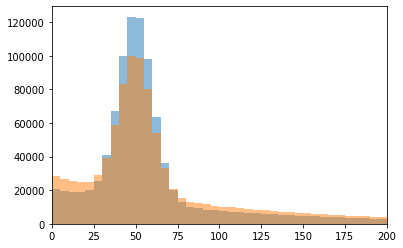

In [24]:
dist = Train[:,3]*predict[:,0]
plt.hist(x=Train[:,3],weights=predict[:,1],alpha=0.5, bins=np.arange(0,1000,5))
plt.hist(x=Train[:,3],weights=predict[:,0],alpha=0.5, bins=np.arange(0,1000,5))
plt.xlim(0,200)

Text(0, 0.5, 'Frequency')

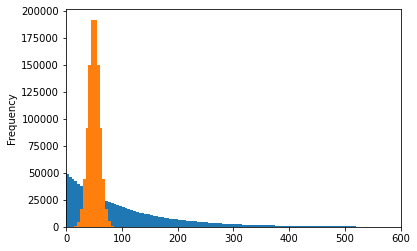

In [26]:
n2, bins2, patches2 = plt.hist(x=ETrain[:,3], bins=np.arange(0,1000,5))
n, bins, patches = plt.hist(x=GTrain[:,3], bins=np.arange(0,1000,5))
plt.xlim(0,600)
plt.ylabel('Frequency')